# 6 exercise 

In [2]:
import pandas as pd
import string
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [3]:
data3 = pd.read_csv(r"E:\IMDB-Dataset.csv")

In [4]:
data3.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
data3.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [7]:
def clean_text(text):
    # Remove punctuation and lower text
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [8]:
data3['review'] = data3['review'].map(clean_text)

In [9]:
data3['review'].head()

0    one reviewers mentioned watching 1 oz episode ...
1    wonderful little production br br filming tech...
2    thought wonderful way spend time hot summer we...
3    basically theres family little boy jake thinks...
4    petter matteis love time money visually stunni...
Name: review, dtype: object

In [10]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data3['review'])
y = data3['sentiment']  # Assuming 'sentiment' is the target column

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = MultinomialNB()

In [13]:
model.fit(X_train, y_train)

MultinomialNB()

In [14]:
y_pred = model.predict(X_test)

In [15]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100}")

Accuracy: 86.17


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.85      0.88      0.86      4961
    positive       0.88      0.84      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [17]:
print(confusion_matrix(y_test,y_pred))

[[4362  599]
 [ 784 4255]]


# 7 exercise

In [35]:
import pandas as pd
import string
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [36]:
data4 = pd.read_csv(r"E:\IMDB-Dataset.csv")

In [37]:
data4.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [38]:
def preprocess_text(text):
    # Remove punctuation and lowercase text
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [39]:
data3['cleaned_review'] = data3['review'].map(preprocess_text)

In [40]:
text = ' '.join(data3['cleaned_review'])

In [41]:
wordcloud = WordCloud(width=800, 
                      height=400, 
                      background_color='white', 
                      stopwords=stopwords.words('english')).generate(text)

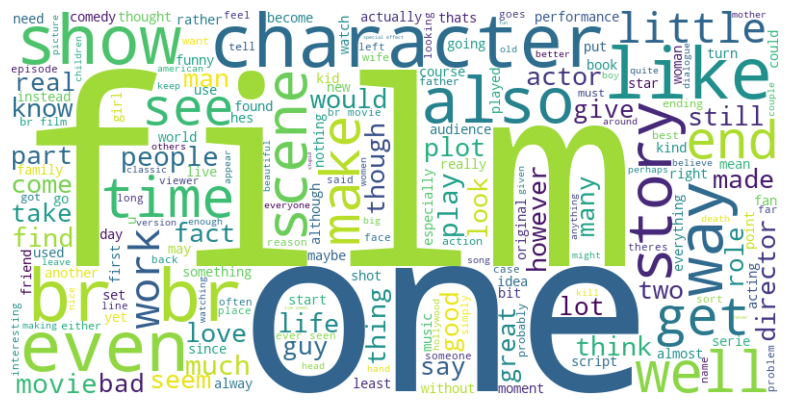

In [42]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

# 8 exercise 

In [49]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import string

In [ ]:
paragraph="""Natural Language Processing (NLP) is a branch of artificial intelligence that
             deals with the interaction between computers and human language.
             It enables machines to understand, interpret, and generate human language. 
             Applications include text analysis, speech recognition, and translation,
             making NLP crucial in modern technology development."""

In [51]:
stop_words = set(stopwords.words('english'))

In [52]:
def extract_keywords(text, num_keywords=5):
    words = re.findall(r'\b\w+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    word_frequency = Counter(filtered_words)
    keywords = [word for word, _ in word_frequency.most_common(num_keywords)]
    return keywords

In [53]:
extract_keywords(paragraph, num_keywords=10)

['language',
 'nlp',
 'human',
 'natural',
 'processing',
 'branch',
 'artificial',
 'intelligence',
 'deals',
 'interaction']

# 9 exercise 

In [64]:
import spacy
from spacy import displacy
nlp=spacy.load('en_core_web_sm')

In [65]:
doc=nlp("""Named Entity Recognition (NER) is an essential task in Natural Language Processing (NLP). 
It involves identifying proper nouns such as persons, organizations, locations, and other important entities in text. 
For instance, entities like 'Barack Obama', 'Google', and 'New York' are automatically recognized by NER systems. 
This technology is widely used in various domains, including news aggregation, healthcare, finance, and legal documentation. 
By identifying and categorizing these entities, NER helps improve search engine results, information extraction, and text summarization.
""")

In [66]:
for entity in doc.ents:
    print(entity.text, entity.label_)

NER ORG
Natural Language Processing (NLP WORK_OF_ART
Barack Obama' PERSON
Google ORG
New York' GPE
NER ORG
healthcare ORG
NER ORG


In [67]:
displacy.render(doc, style='ent', jupyter=True)

# 10 exercise 

In [68]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [69]:
documents = [
    "The cat sat on the mat",
    "The dog sat on the mat",
    "Cats and dogs are animals",
    "The mat is blue",
    "The quick brown fox jumps over the lazy dog",
    "The dog is a loyal animal",
    "Cats are independent animals",
    "The blue mat is new"
]

In [70]:
vectorizer = TfidfVectorizer(stop_words="english")

In [71]:
X = vectorizer.fit_transform(documents)

In [72]:
n_components = 2  # Number of latent topics
svd_model = TruncatedSVD(n_components=n_components)
lsa = svd_model.fit_transform(X)

In [73]:
terms = vectorizer.get_feature_names_out()

In [74]:
for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key=lambda x: x[1], reverse=True)
    
    print(f"Concept {i + 1}:")
    for term in sorted_terms[:5]:  
        print(term[0], term[1])  
    print("\n")

Concept 1:
mat 0.6654749745613435
blue 0.4814579077859333
sat 0.39811489017658575
dog 0.24600273021349084
new 0.2307982761360983


Concept 2:
animals 0.6072471929778377
cats 0.6072471929778377
independent 0.36228558710020087
dogs 0.36228558710020037
blue 5.006195932023018e-16




In [75]:
print("Latent representation of documents:")
print(lsa)

Latent representation of documents:
[[ 6.66510918e-01 -5.26887179e-16]
 [ 7.31766736e-01 -1.06787355e-15]
 [ 3.17080752e-16  8.89987722e-01]
 [ 7.85467963e-01  2.91256890e-16]
 [ 1.29689510e-01 -2.67189687e-16]
 [ 1.76248196e-01 -9.43290839e-16]
 [ 3.02064967e-16  8.89987722e-01]
 [ 7.28122133e-01  3.07517665e-16]]


# 11 EXERCISE 

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import string

In [90]:
translator = str.maketrans("", "", string.punctuation)

In [91]:
def preprocess(text):
    tokens = text.lower().translate(translator).split()
    return [word for word in tokens if word not in stop_words]

In [92]:
docs = [
    "The cat sat on the mat.",
    "The dog sat on the mat.",
    "Cats and dogs are animals.",
    "The mat is blue.",
    "The quick brown fox jumps over the lazy dog.",
    "The dog is a loyal animal.",
    "Cats are independent animals.",
    "The blue mat is new.",
    "Artificial intelligence is revolutionizing industries.",
    "Machine learning and data science are important fields.",
    "Natural language processing is a subset of AI.",
    "Deep learning models are used for image recognition.",
    "Healthcare technology is advancing rapidly.",
    "Financial technology is transforming banking."
]

In [93]:
preprocessed_docs = [preprocess(doc) for doc in docs]

In [94]:
dictionary = Dictionary(preprocessed_docs)
corpus = [dictionary.doc2bow(doc) for doc in preprocessed_docs]

In [95]:
def calculate_coherence(dictionary, corpus, texts, num_topics):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return coherence_score

In [99]:
min_topics = 2
max_topics = 10  
step_size = 1
topic_range = range(min_topics, max_topics + 1, step_size)
coherence_scores = []

In [100]:
for num_topics in topic_range:
    coherence_score = calculate_coherence(dictionary, corpus, preprocessed_docs, num_topics)
    coherence_scores.append(coherence_score)

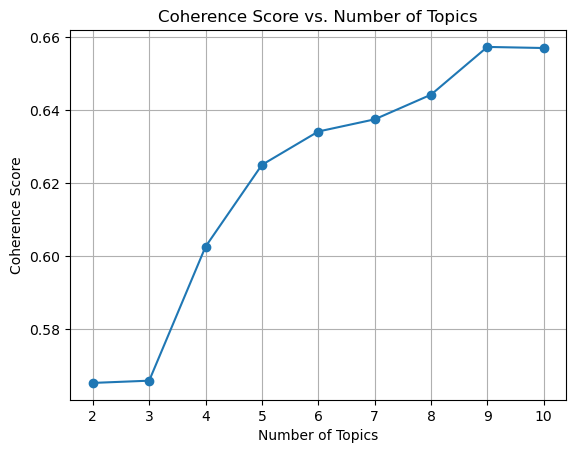

In [104]:
plt.plot(topic_range, coherence_scores, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs. Number of Topics')
plt.xticks(topic_range)  
plt.grid(True) 
plt.show()

In [102]:
optimal_num_topics = topic_range[np.argmax(coherence_scores)]
print("Optimal number of topics:", optimal_num_topics)
print("Coherence score for optimal number of topics:", coherence_scores[np.argmax(coherence_scores)])

Optimal number of topics: 9
Coherence score for optimal number of topics: 0.6573807132676159


# 12 EXERCISE 

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [19]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=("headers", "footers", "quotes"))
documents = dataset.data

In [20]:
no_features = 1000 
no_topics = 10      

In [21]:
tf_vectorizer = CountVectorizer(max_df=0.95, 
                                min_df=2, 
                                max_features=no_features, 
                                stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_features_names= tf_vectorizer.get_feature_names_out()

In [22]:
lda = LatentDirichletAllocation(n_components=no_topics, 
                                max_iter=5,
                                learning_method='online',
                                 learning_offset=50.,
                                random_state=0)
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, random_state=0)

In [26]:
no_top_words = 10  # Define the number of top words to display

for topic_idx, topic in enumerate(lda.components_):
    print("Topic %d:" % (topic_idx))
    print(" ".join([tf_features_names[i] 
                     for i in topic.argsort()[:-no_top_words - 1:-1]]))

Topic 0:
people gun armenian armenians war turkish states israel said children
Topic 1:
government people law mr use president don think right public
Topic 2:
space program output entry data nasa use science research build
Topic 3:
key car chip used keys bike use bit clipper number
Topic 4:
edu file com available mail ftp files information image send
Topic 5:
god people does jesus say think believe don know just
Topic 6:
windows use drive thanks does problem know card like using
Topic 7:
ax max b8f g9v a86 pl 145 1d9 0t 34u
Topic 8:
just don like think know good time ve people said
Topic 9:
10 00 25 15 12 20 11 14 17 16
